In [189]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import json
from skimage.color import rgb2gray
from matplotlib.patches import Circle

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.mplot3d import Axes3D

all = Image.open('../cell3/nice.jpg')
with open("../cell3/preprocess.json", 'r') as file:
    preprocess = json.load(file)

mit = Image.open('../cell3/nice images/mitochondria.jpg')

er = Image.open('../cell3/nice images/er.jpg')

randomfield = Image.open('../plots/randomfield.jpg')


In [32]:
points = preprocess["point patterns"]["peroxisomes"]

with open("../mean_density_est.json", 'r') as file:
    mde = json.load(file)

values = np.array(mde['v'])
values[values == 'NA'] = np.nan
values = values.astype('float')  # Ensure the matrix is of float type to accommodate np.nan
masked_array = np.ma.array(values, mask=np.isnan(values))

mde["image"] = masked_array


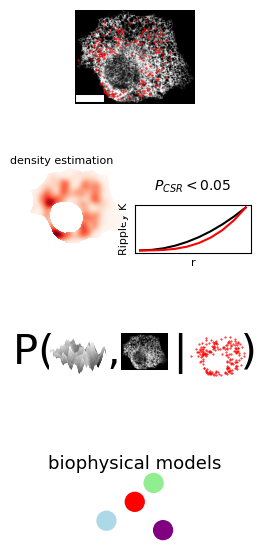

In [198]:
f, ax = plt.subplots(1, 1,figsize=(3, 7))
scale = 10.8557 #px/um

ax.axis("off")


#TOP##################################
DZ = 0.1

H = (1- 3*DZ)/4


axs_exp = ax.inset_axes([0.0,1-H,1,H])
axs_exp.axis("off")

axs_sum = ax.inset_axes([0.,1-2*H -DZ,1,H])

axs_sum.axis("off")

axs_sm = ax.inset_axes([0.0,1-3*H -2*DZ,1,H])

axs_sm.axis("off")

axs_bp = ax.inset_axes([0,0,1,H])
axs_bp.axis("off")


original_extend = (0, np.array(all).shape[1]/scale, 0, np.array(all).shape[0]/scale)

#axs_top.axis("off")
axs_exp.imshow(rgb2gray(all),origin = "lower",extent = original_extend,cmap = "gray" )
axs_exp.plot([2,12],[3,3],color = "white",linewidth = 5)
#axs_exp.text(7,4,r"$10\mathrm{\mu m}$",horizontalalignment='center',color = "white")

axs_exp.scatter(points["x"],points["y"],s =0.2,color = "red")

axs_kf  = axs_sum.inset_axes([0.5,0.0,0.5,0.5])

x = np.linspace(0,1,10)
axs_kf.plot(x,x**2,color ="black")
axs_kf.plot(x,x**3,color ="red")
axs_kf.set_ylabel("Rippley K",size = 8)
axs_kf.set_xlabel("r",size = 8)
axs_kf.set_xticks([])
axs_kf.set_yticks([])



axs_mde  = axs_sum.inset_axes([0.0,0.1,0.5,0.8])

axs_mde.imshow(mde["image"],extent = original_extend,origin = "lower",cmap = "Reds")
axs_mde.axis("off")
axs_mde.text(20,50,r"density estimation",ha = "center",va = "center",size = 8)


axs_pcsr  = axs_sum.inset_axes([0.5,0.5,0.5,0.5])
axs_pcsr.text(0.5,0.4,r"$P_{CSR} < 0.05$",ha = "center",va = "center")
axs_pcsr.axis("off")


axs_sm.text(0.5,0.5,r"P(    ,    |    )",ha = "center",va = "center",size =30)
inset_ax = axs_sm.inset_axes([0.13,0.25,0.25,0.45])

inset_ax.imshow(randomfield)
inset_ax.axis("off")


rx= np.random.random(50)
ry= np.random.random(50)

inset_ax = axs_sm.inset_axes([0.73,0.25,0.25,0.45])

inset_ax.scatter(points["x"],points["y"],s =0.2,color ="red")
inset_ax.axis("off")



inset_ax = axs_sm.inset_axes([0.44,0.30,0.20,0.45])
inset_ax.imshow(er,origin = "lower")
inset_ax.axis("off")
#axs_top.axis("off")
#ax1 = axs_top.inset_axes([0,0.0,2/5,1.0])

axs_bp.text(0.5,0.9,"biophysical models",ha = "center",va = "center",size = 13)

# List of circle specifications (x, y, radius, color)
circles = [
    (0.2, 0.3, 0.1, 'lightblue'),  # Each tuple is (x, y, radius, color)
    (0.5, 0.5, 0.1, 'red'),
    (0.8, 0.2, 0.1, 'purple'),
    (0.7, 0.7, 0.1, 'lightgreen')
]

# Loop through the circles and add them to the axes
for x, y, radius, color in circles:
    circle = Circle((x, y), radius, color=color)
    axs_bp.add_patch(circle)

# Set the aspect of the plot axis to equal to make sure the circle is round
axs_bp.set_aspect('equal')

# Optionally set limits if you want a specific view
axs_bp.set_xlim(0, 1)
axs_bp.set_ylim(0, 1)
plt.savefig("../plots/first_figure.svg",dpi= 400)

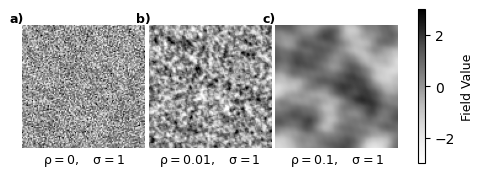

In [59]:
import gstools as gs
import numpy as np
import matplotlib.pyplot as plt


f, axs = plt.subplots(1,figsize=(6, 2))

axs.axis("off")
ax1 = axs.inset_axes([0,0,0.33,1])
ax2 = axs.inset_axes([0.34,0,0.33,1])
ax3 = axs.inset_axes([0.68,0,0.33,1])

common_vmin = -3
common_vmax = 3

# Define the spatial range and resolution
x = y =  range(100)

# Create a model for the Gaussian field: e.g., an exponential model
model = gs.Matern(dim=2, var=1, len_scale=0.00001, nu=2)
# Create a spatial random field based on the model
srf = gs.SRF(model)
# Generate the field on your grid
field = srf.structured([x, y])
# Plot the field
cax = ax1.imshow(field, origin="lower",cmap =  "Greys",vmin=common_vmin, vmax=common_vmax)
ax1.axis("off")

# Create a model for the Gaussian field: e.g., an exponential model
model = gs.Matern(dim=2, var=1, len_scale=1, nu=2)
# Create a spatial random field based on the model
srf = gs.SRF(model)
# Generate the field on your grid
field = srf.structured([x, y])
# Plot the field
ax2.imshow(field, origin="lower",cmap =  "Greys",vmin=common_vmin, vmax=common_vmax)
ax2.axis("off")


# Create a model for the Gaussian field: e.g., an exponential model
model = gs.Matern(dim=2, var=1, len_scale=10, nu=2)
# Create a spatial random field based on the model
srf = gs.SRF(model)
# Generate the field on your grid
field = srf.structured([x, y])
# Plot the field
ax3.imshow(field, origin="lower",cmap =  "Greys",vmin=common_vmin, vmax=common_vmax)
ax3.axis("off")


cbar = f.colorbar(cax, ax= axs)
cbar.set_label(label="Field Value",fontsize=9, loc='center')


ax1.text(0.5,-0.1,r"$\mathrm{\rho = 0, \quad \sigma = 1}$",transform = ax1.transAxes,size = 9,va = "center",ha = "center")
ax2.text(0.5,-0.1,r"$\mathrm{\rho = 0.01, \quad \sigma = 1}$",transform = ax2.transAxes,size = 9,va = "center",ha = "center")
ax3.text(0.5,-0.1,r"$\mathrm{\rho = 0.1, \quad \sigma = 1}$",transform = ax3.transAxes,size = 9,va = "center",ha = "center")


ax1.text(-0.1,1.05,r"a)",transform = ax1.transAxes,size = 9,va = "center",ha = "left",fontweight='bold')
ax2.text(-0.1,1.05,r"b)",transform = ax2.transAxes,size = 9,va = "center",ha = "left",fontweight='bold')
ax3.text(-0.1,1.05,r"c)",transform = ax3.transAxes,size = 9,va = "center",ha = "left",fontweight='bold')

plt.savefig("GRF_examples.pdf")


## import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import gstools as gs

# Define the spatial range and resolution

# Create a meshgrid for plotting
gridx = np.linspace(0, 100, 100)  # 100 points from 0 to 100
gridy = np.linspace(0, 100, 100)  # 100 points from 0 to 100
mesh = np.meshgrid(gridx, gridy)  # Create the meshgrid for the spatial domain

# Create a model for the Gaussian field: e.g., an exponential model
model = gs.Matern(dim=2, var=1, len_scale=5, nu=2)

# Step 1: Define the covariance model
# For a Gaussian model, we need a mean, a variance, and a correlation length
model = gs.Gaussian(dim=2, var=1, len_scale=10)

# Step 2: Create a spatial domain (e.g., a regular grid in 2D)
gridx = np.linspace(0, 100, 100)  # 100 points from 0 to 100
gridy = np.linspace(0, 100, 100)  # 100 points from 0 to 100
mesh = np.meshgrid(gridx, gridy)  # Create the meshgrid for the spatial domain

# Step 3: Simulate the random field over the domain
field = gs.SRF(model)
random_field = field(mesh)
# Create a spatial random field based on the model
plt.imshow(random_field)

In [10]:
import numpy as np
import gstools as gs
import matplotlib.pyplot as plt

# Define the covariance model
model = gs.Gaussian(dim=2, var=1, len_scale=10)

# Create a spatial domain
gridx = np.linspace(0, 100, 100)  # 100 points from 0 to 100
gridy = np.linspace(0, 100, 100)  # 100 points from 0 to 100

# Simulate the random field over the domain
field = gs.SRF(model)
# When using meshgrid with gstools, ensure you pass the coordinates directly
random_field = field(gridx, gridy, mesh_type="structured")

# Since we're using a structured mesh, `random_field` is already in the correct shape for plotting
# Plot the simulated field
plt.imshow(random_field, origin="lower", extent=(0, 100, 0, 100))
plt.colorbar(label="Value")
plt.title("Simulated Gaussian Random Field")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()



ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

(0.0, 1.0)

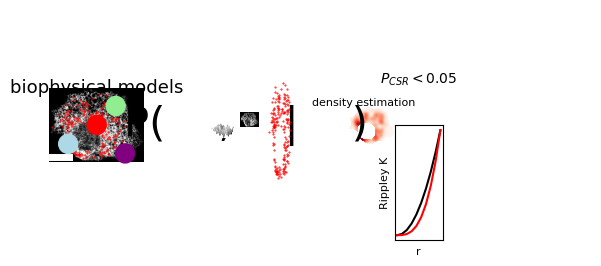

In [201]:
f, ax = plt.subplots(1, 1,figsize=(7, 3))
scale = 10.8557 #px/um

ax.axis("off")


#TOP##################################
DZ = 0.1

H = (1- 3*DZ)/4


axs_exp = ax.inset_axes([0,0,H,1])
axs_exp.axis("off")

axs_sum = ax.inset_axes([1-2*H -DZ,0,H,1])

axs_sum.axis("off")

axs_sm = ax.inset_axes([1-3*H -2*DZ,0,H,1])

axs_sm.axis("off")

axs_bp = ax.inset_axes([0,0,H,1])
axs_bp.axis("off")


original_extend = (0, np.array(all).shape[1]/scale, 0, np.array(all).shape[0]/scale)

#axs_top.axis("off")
axs_exp.imshow(rgb2gray(all),origin = "lower",extent = original_extend,cmap = "gray" )
axs_exp.plot([2,12],[3,3],color = "white",linewidth = 5)
#axs_exp.text(7,4,r"$10\mathrm{\mu m}$",horizontalalignment='center',color = "white")

axs_exp.scatter(points["x"],points["y"],s =0.2,color = "red")

axs_kf  = axs_sum.inset_axes([0.5,0.0,0.5,0.5])

x = np.linspace(0,1,10)
axs_kf.plot(x,x**2,color ="black")
axs_kf.plot(x,x**3,color ="red")
axs_kf.set_ylabel("Rippley K",size = 8)
axs_kf.set_xlabel("r",size = 8)
axs_kf.set_xticks([])
axs_kf.set_yticks([])



axs_mde  = axs_sum.inset_axes([0.0,0.1,0.5,0.8])

axs_mde.imshow(mde["image"],extent = original_extend,origin = "lower",cmap = "Reds")
axs_mde.axis("off")
axs_mde.text(20,50,r"density estimation",ha = "center",va = "center",size = 8)


axs_pcsr  = axs_sum.inset_axes([0.5,0.5,0.5,0.5])
axs_pcsr.text(0.5,0.4,r"$P_{CSR} < 0.05$",ha = "center",va = "center")
axs_pcsr.axis("off")


axs_sm.text(0.5,0.5,r"P(    ,    |    )",ha = "center",va = "center",size =30)
inset_ax = axs_sm.inset_axes([0.13,0.25,0.25,0.45])

inset_ax.imshow(randomfield)
inset_ax.axis("off")


rx= np.random.random(50)
ry= np.random.random(50)

inset_ax = axs_sm.inset_axes([0.73,0.25,0.25,0.45])

inset_ax.scatter(points["x"],points["y"],s =0.2,color ="red")
inset_ax.axis("off")



inset_ax = axs_sm.inset_axes([0.44,0.30,0.20,0.45])
inset_ax.imshow(er,origin = "lower")
inset_ax.axis("off")
#axs_top.axis("off")
#ax1 = axs_top.inset_axes([0,0.0,2/5,1.0])

axs_bp.text(0.5,0.9,"biophysical models",ha = "center",va = "center",size = 13)

# List of circle specifications (x, y, radius, color)
circles = [
    (0.2, 0.3, 0.1, 'lightblue'),  # Each tuple is (x, y, radius, color)
    (0.5, 0.5, 0.1, 'red'),
    (0.8, 0.2, 0.1, 'purple'),
    (0.7, 0.7, 0.1, 'lightgreen')
]

# Loop through the circles and add them to the axes
for x, y, radius, color in circles:
    circle = Circle((x, y), radius, color=color)
    axs_bp.add_patch(circle)

# Set the aspect of the plot axis to equal to make sure the circle is round
axs_bp.set_aspect('equal')

# Optionally set limits if you want a specific view
axs_bp.set_xlim(0, 1)
axs_bp.set_ylim(0, 1)
#plt.savefig("../plots/first_figure.svg",dpi= 400)

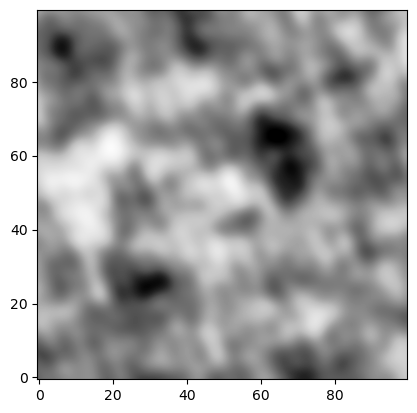

In [6]:
import gstools as gs
import numpy as np
import matplotlib.pyplot as plt



common_vmin = -3
common_vmax = 3

# Define the spatial range and resolution
x = y =  range(100)

# Create a model for the Gaussian field: e.g., an exponential model
model = gs.Matern(dim=2, var=1, len_scale=5, nu=2)
# Create a spatial random field based on the model
srf = gs.SRF(model)
# Generate the field on your grid
field = srf.structured([x, y])
# Plot the field
plt.imshow(field, origin="lower",cmap =  "Greys",vmin=common_vmin, vmax=common_vmax,interpolation = "bicubic")
plt.savefig("GRF.svg")